### 서울시 교통사고 시각화

In [9]:
import pandas as pd
import folium

In [10]:
# 서울시 교통사고 데이터 불러오기
traffic_seoul = pd.read_csv("../Data/newSeoul_2005_2019.csv")
traffic_seoul.head()  # PK -> 년도 월 자치구명

,년도,월,자치구명,발생건수,사망자수,부상자수
0,2005,1,종로구,93,2,138
1,2005,2,종로구,84,3,125
2,2005,3,종로구,117,0,142
3,2005,4,종로구,138,2,212
4,2005,5,종로구,145,2,207


In [3]:
traffic_seoul.tail()

,년도,월,자치구명,발생건수,사망자수,부상자수
4495,2019,8,강동구,127,2,175
4496,2019,9,강동구,98,2,137
4497,2019,10,강동구,108,1,144
4498,2019,11,강동구,146,0,199
4499,2019,12,강동구,108,1,131


In [4]:
traffic_seoul.shape

(4500, 6)

In [5]:
traffic_seoul.describe

<bound method NDFrame.describe of         년도   월 자치구명  발생건수  사망자수  부상자수
0     2005   1  종로구    93     2   138
1     2005   2  종로구    84     3   125
2     2005   3  종로구   117     0   142
3     2005   4  종로구   138     2   212
4     2005   5  종로구   145     2   207
...    ...  ..  ...   ...   ...   ...
4495  2019   8  강동구   127     2   175
4496  2019   9  강동구    98     2   137
4497  2019  10  강동구   108     1   144
4498  2019  11  강동구   146     0   199
4499  2019  12  강동구   108     1   131

[4500 rows x 6 columns]>

In [6]:
traffic_seoul.info()

<class 'pandas.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년도      4500 non-null   int64
 1   월       4500 non-null   int64
 2   자치구명    4500 non-null   str  
 3   발생건수    4500 non-null   int64
 4   사망자수    4500 non-null   int64
 5   부상자수    4500 non-null   int64
dtypes: int64(5), str(1)
memory usage: 211.1 KB


---
#### 컬럼별 데이터 확인

In [7]:
# 년도  (빈도수)
traffic_seoul['년도'].value_counts()

년도
2005    300
2006    300
2007    300
2008    300
2009    300
2010    300
2011    300
2012    300
2013    300
2014    300
2015    300
2016    300
2017    300
2018    300
2019    300
Name: count, dtype: int64

In [8]:
# 월별
traffic_seoul['월'].value_counts()

월
1     375
2     375
3     375
4     375
5     375
6     375
7     375
8     375
9     375
10    375
11    375
12    375
Name: count, dtype: int64

In [9]:
# 자치구별
traffic_seoul['자치구명'].value_counts()

자치구명
종로구     180
중구      180
용산구     180
성동구     180
광진구     180
동대문구    180
중랑구     180
성북구     180
강북구     180
도봉구     180
노원구     180
은평구     180
서대문구    180
마포구     180
양천구     180
강서구     180
구로구     180
금천구     180
영등포구    180
동작구     180
관악구     180
서초구     180
강남구     180
송파구     180
강동구     180
Name: count, dtype: int64

---
#### 자치구명별 발생건수

In [10]:
traffic_seoul.head()

,년도,월,자치구명,발생건수,사망자수,부상자수
0,2005,1,종로구,93,2,138
1,2005,2,종로구,84,3,125
2,2005,3,종로구,117,0,142
3,2005,4,종로구,138,2,212
4,2005,5,종로구,145,2,207


In [11]:
resionAcc_mean = \
    traffic_seoul.groupby(
        '자치구명',
        as_index = False
    )['발생건수'].mean()
resionAcc_mean.head().sort_values('발생건수', ascending=False)

,자치구명,발생건수
0,강남구,295.833333
3,강서구,149.350000
4,관악구,137.761111
1,강동구,119.605556
2,강북구,103.933333


In [12]:
resionAcc_mean.sort_values('발생건수', ascending=False).iloc[0] # iloc는 마지막을 포함 X.

자치구명           강남구
발생건수    295.833333
Name: 0, dtype: object

In [13]:
resionAcc_mean.head()

,자치구명,발생건수
0,강남구,295.833333
1,강동구,119.605556
2,강북구,103.933333
3,강서구,149.350000
4,관악구,137.761111


#### # 어느 지역이 빈번히 사고가 발생?

In [14]:
# 자치구별 표준편차 데이터프레임
resionAcc_std = \
    traffic_seoul.groupby(
        '자치구명',
        as_index = False
    )['발생건수'].std()
resionAcc_std.head()

,자치구명,발생건수
0,강남구,36.470773
1,강동구,17.352248
2,강북구,15.677832
3,강서구,21.267773
4,관악구,24.162477


In [15]:
# 자치구별 발생건수의 변동계수
# 변동계수 = 표준편차 / 평균
resionAcc_cv = resionAcc_std['발생건수'] / resionAcc_mean['발생건수']
resionAcc_cv.head()

0    0.123281
1    0.145079
2    0.150845
3    0.142402
4    0.175394
Name: 발생건수, dtype: float64

In [16]:
# 자치구명과 변동계수를 가진 dataframe 만들기
resionAcc = \
    pd.DataFrame(
        {
            '자치구명': resionAcc_mean.자치구명,
            '변동계수': resionAcc_cv.values
        }
)
resionAcc

,자치구명,변동계수
0,강남구,0.123281
1,강동구,0.145079
2,강북구,0.150845
3,강서구,0.142402
4,관악구,0.175394
5,광진구,0.219095
6,구로구,0.134908
7,금천구,0.187408
8,노원구,0.138821
9,도봉구,0.176840


In [17]:
# 변동계수를 이용하여 발생건수가 높은 지역 출력. (변동계수가 낮아야 빈번하지 않음)
resionAcc.sort_values('변동계수', ascending=False)

,자치구명,변동계수
5,광진구,0.219095
21,은평구,0.205778
7,금천구,0.187408
11,동작구,0.180981
9,도봉구,0.176840
4,관악구,0.175394
22,종로구,0.174468
14,서초구,0.173739
23,중구,0.168266
18,양천구,0.165369


---
#### 자치구별 부상자수 변동계수 구하기

In [18]:
resionInJure_mean = \
        traffic_seoul.groupby(
            '자치구명',
            as_index = False
        )['부상자수'].mean()
resionInJure_mean.head()

,자치구명,부상자수
0,강남구,428.727778
1,강동구,166.555556
2,강북구,142.694444
3,강서구,212.266667
4,관악구,189.427778


In [19]:
resionInJure_std = \
    traffic_seoul.groupby(
        '자치구명',
        as_index = False
    )['부상자수'].std()
resionInJure_std.head()

,자치구명,부상자수
0,강남구,53.788208
1,강동구,25.542652
2,강북구,21.793366
3,강서구,32.399669
4,관악구,37.580012


In [20]:
resionInJure_cv = resionInJure_std['부상자수'] / resionInJure_mean['부상자수']
resionInJure_cv.head()

0    0.125460
1    0.153358
2    0.152728
3    0.152637
4    0.198387
Name: 부상자수, dtype: float64

In [21]:
resionInJure = \
    pd.DataFrame(
        {
            '부상자수': resionInJure_mean.부상자수,
            '변동계수' : resionInJure_cv.values
        }
    )
resionInJure.head()

,부상자수,변동계수
0,428.727778,0.125460
1,166.555556,0.153358
2,142.694444,0.152728
3,212.266667,0.152637
4,189.427778,0.198387


----
#### 자치구별 사망자수 변동계수 구하기

In [22]:
resionDeath_mean = \
    traffic_seoul.pivot_table(
        '사망자수',
        index = '자치구명',
    )
resionDeath_mean.head()

,사망자수
자치구명,
강남구,2.066667
강동구,1.344444
강북구,1.011111
강서구,1.594444
관악구,1.316667


In [23]:
resionDeath_std = \
    traffic_seoul.pivot_table(
        values = '사망자수',
        index = '자치구명',
        aggfunc='std'
)
resionDeath_std.head()

,사망자수
자치구명,
강남구,1.504555
강동구,1.037413
강북구,1.077909
강서구,1.368836
관악구,1.121028


In [24]:
resionDeath_cv = resionDeath_std['사망자수'] / resionDeath_mean['사망자수']
resionDeath_cv.head()

자치구명
강남구    0.728011
강동구    0.771630
강북구    1.066063
강서구    0.858503
관악구    0.851414
Name: 사망자수, dtype: float64

In [25]:
resionDeath = \
    pd.DataFrame(
        {
            '사망자수': resionDeath_mean.사망자수,
            '변동계수' : resionDeath_cv.values
        }
    )
resionDeath.sort_values('변동계수' , ascending=True)

,사망자수,변동계수
자치구명,,
영등포구,2.300000,0.648154
강남구,2.066667,0.728011
강동구,1.344444,0.771630
송파구,1.816667,0.792421
서초구,1.633333,0.825989
관악구,1.316667,0.851414
강서구,1.594444,0.858503
종로구,1.127778,0.864276
동대문구,1.811111,0.875046


In [26]:
#### 발생건수와 부상자수의 상관계수
traffic_seoul[['발생건수', '부상자수']].corr()


,발생건수,부상자수
발생건수,1.000000,0.978029
부상자수,0.978029,1.000000


In [27]:
# 부상자수와 사망자수의 상관계수 
traffic_seoul[['부상자수', '사망자수']].corr()

,부상자수,사망자수
부상자수,1.000000,0.244406
사망자수,0.244406,1.000000


In [28]:
# 발생건수와 사망자수의 상관계수
traffic_seoul[['발생건수', '사망자수']].corr()


,발생건수,사망자수
발생건수,1.000000,0.246224
사망자수,0.246224,1.000000


---
#### 발생건수와 부상자수의 산포도

In [29]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

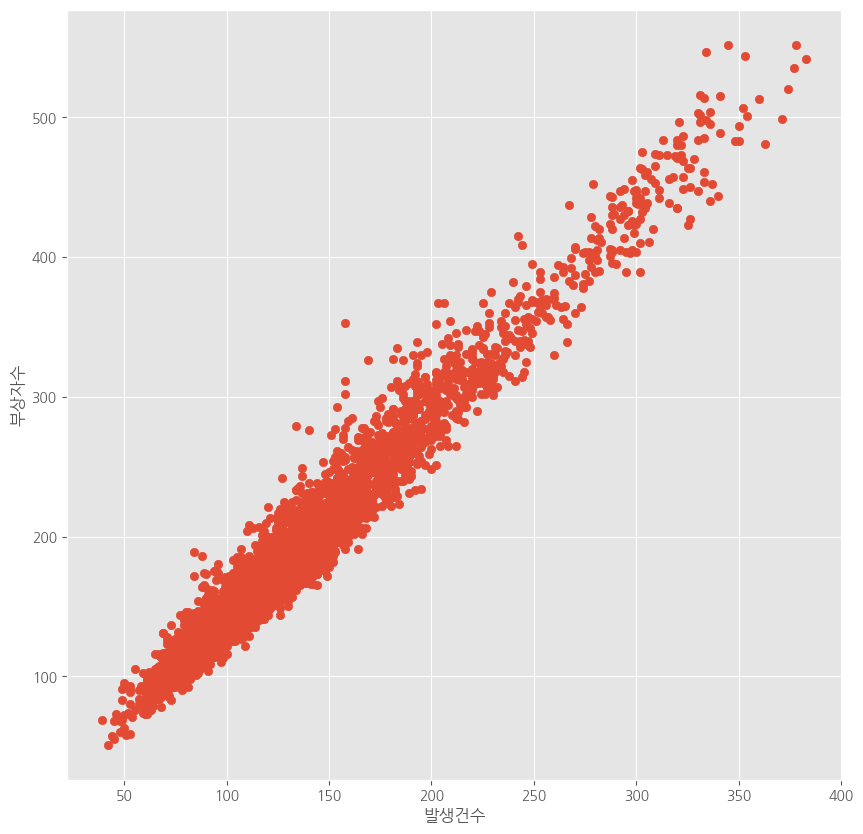

In [30]:
# 산점도
plt.style.use('ggplot')

plt.figure(figsize = (10,10))
plt.scatter(
    x = traffic_seoul.발생건수,
    y = traffic_seoul.부상자수
)
plt.xlabel('발생건수')
plt.ylabel('부상자수')
plt.show()


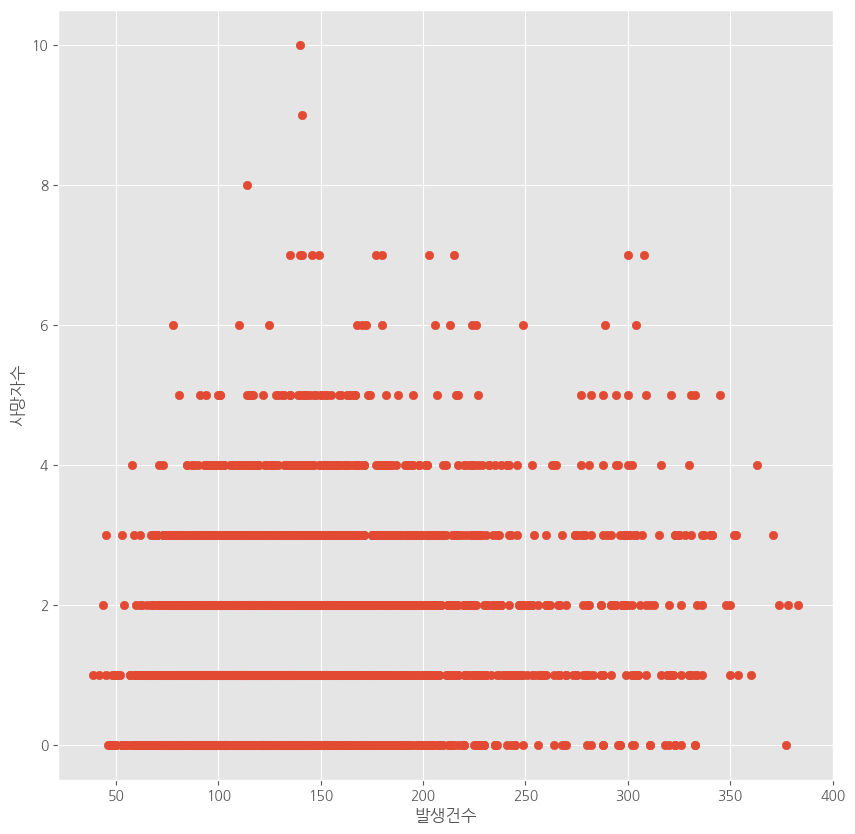

In [31]:
# 산점도
plt.style.use('ggplot')

plt.figure(figsize = (10,10))
plt.scatter(
    x = traffic_seoul.발생건수,
    y = traffic_seoul.사망자수
)
plt.xlabel('발생건수')
plt.ylabel('사망자수')
plt.show()


In [14]:
# 2019년 데이터만 추출하기

traffic_seoul_2019 = traffic_seoul[traffic_seoul.년도 == 2019]
traffic_seoul_2019.head()
traffic_seoul_2019.shape

(300, 6)

In [15]:
traffic_seoul_2019.pivot_table(
    index = '자치구명',
    values=['발생건수', '부상자수', '사망자수'],
    aggfunc='sum'
).head()

,발생건수,부상자수,사망자수
자치구명,,,
강남구,3722,5182,14
강동구,1414,1910,11
강북구,1277,1706,7
강서구,1829,2491,20
관악구,1363,1755,10


In [16]:
traffic_seoul_2019.groupby(
    '자치구명',
    as_index=False
)[['발생건수', '부상자수', '사망자수']].sum().head()
traffic_seoul_2019

,년도,월,자치구명,발생건수,사망자수,부상자수
4200,2019,1,종로구,87,1,125
4201,2019,2,종로구,66,1,84
4202,2019,3,종로구,87,2,122
4203,2019,4,종로구,85,0,131
4204,2019,5,종로구,112,1,158
...,...,...,...,...,...,...
4495,2019,8,강동구,127,2,175
4496,2019,9,강동구,98,2,137
4497,2019,10,강동구,108,1,144
4498,2019,11,강동구,146,0,199


In [17]:
traffic_seoul.pivot_table(
    index = '자치구명',
    values=['발생건수', '부상자수', '사망자수'],
    aggfunc='sum'
).head()

,발생건수,부상자수,사망자수
자치구명,,,
강남구,53250,77171,372
강동구,21529,29980,242
강북구,18708,25685,182
강서구,26883,38208,287
관악구,24797,34097,237


In [18]:
# traffic_seoul['년도'] == 2019
traffic_anal = traffic_seoul_2019.copy()
traffic_anal

,년도,월,자치구명,발생건수,사망자수,부상자수
4200,2019,1,종로구,87,1,125
4201,2019,2,종로구,66,1,84
4202,2019,3,종로구,87,2,122
4203,2019,4,종로구,85,0,131
4204,2019,5,종로구,112,1,158
...,...,...,...,...,...,...
4495,2019,8,강동구,127,2,175
4496,2019,9,강동구,98,2,137
4497,2019,10,강동구,108,1,144
4498,2019,11,강동구,146,0,199


In [50]:
import pandas as pd
import folium

In [19]:
seoul_limit = pd.read_csv("../Data/seoul.csv", encoding = "euc-kr")
seoul_limit.head()

,area,lon,lat
0,강남구,127.0475,37.51731
1,강동구,127.1238,37.53013
2,강북구,127.0255,37.63975
3,관악구,126.9515,37.47834
4,구로구,126.8875,37.49547


In [20]:
seoul_limit.rename(
      columns={'area':'자치구명'},
      inplace=True
)
seoul_limit.head()

,자치구명,lon,lat
0,강남구,127.0475,37.51731
1,강동구,127.1238,37.53013
2,강북구,127.0255,37.63975
3,관악구,126.9515,37.47834
4,구로구,126.8875,37.49547


In [21]:
# seoul_limit 와 traffic_anal을 merge 하여
data_result = \
    pd.merge(
        traffic_anal,
        seoul_limit,
        on = '자치구명'
    )
data_result.head()

,년도,월,자치구명,발생건수,사망자수,부상자수,lon,lat
0,2019,1,종로구,87,1,125,126.9793,37.57323
1,2019,2,종로구,66,1,84,126.9793,37.57323
2,2019,3,종로구,87,2,122,126.9793,37.57323
3,2019,4,종로구,85,0,131,126.9793,37.57323
4,2019,5,종로구,112,1,158,126.9793,37.57323


In [22]:
data_result['발생건수'] = data_result['발생건수'].astype(float)
data_result['부상자수'] = data_result['부상자수'].astype(float)
data_result['사망자수'] = data_result['사망자수'].astype(float)
data_result.tail()

,년도,월,자치구명,발생건수,사망자수,부상자수,lon,lat
295,2019,8,강동구,127.0,2.0,175.0,127.1238,37.53013
296,2019,9,강동구,98.0,2.0,137.0,127.1238,37.53013
297,2019,10,강동구,108.0,1.0,144.0,127.1238,37.53013
298,2019,11,강동구,146.0,0.0,199.0,127.1238,37.53013
299,2019,12,강동구,108.0,1.0,131.0,127.1238,37.53013


In [23]:
data_result.info()

<class 'pandas.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      300 non-null    int64  
 1   월       300 non-null    int64  
 2   자치구명    300 non-null    str    
 3   발생건수    300 non-null    float64
 4   사망자수    300 non-null    float64
 5   부상자수    300 non-null    float64
 6   lon     300 non-null    float64
 7   lat     300 non-null    float64
dtypes: float64(5), int64(2), str(1)
memory usage: 18.9 KB


In [59]:
# # 서울 지도 만들기

# seoul_map = folium.Map(
#         location=[37.55, 126.98],  # 위도 , 경도
#         zoom_start = 12,
# )
# seoul_map

In [5]:
import folium
import pandas as pd 

In [24]:
# 서울 지도 만들기

seoul_map = folium.Map(
        location=[37.55, 126.98],  # 위도 , 경도
        zoom_start = 12,

)
seoul_map

In [27]:
# 서울 지도 만들기
seoul_map = folium.Map(
        location=[37.55, 126.98],  # 위도 , 경도
        zoom_start = 12,

)

for name, acc, lat, lng in zip(data_result.자치구명, data_result.발생건수, data_result.lat, data_result.lon):
    popup = folium.Popup(name, max_width=200, sticky=True)
    folium.Marker(
        [lat, lng],
        popup=popup
    ).add_to(seoul_map)
    folium.CircleMarker(
        [lat, lng],
        radius = acc/10,
        color = 'skyblue',
        fill = False,
        fill_color = 'skyblue',
        fill_opacity=0.5
    ).add_to(seoul_map)

seoul_map